In [3]:
import covid_feature_extraction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

C:\Users\Matt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [90]:
def GPR_wrapper(county_X, county_y, field, field_name, length_scale, target_name):
    selected_column = county_X[field]
    selected_column = np.array(selected_column).reshape(len(selected_column),1)
    y = county_y
    y = np.array(y).reshape(len(y),1)
    combined = np.concatenate([selected_column,y],axis=1)
    combined = combined[combined[:,0].argsort()]

    selected_column = combined[:,0]
    y = combined[:,1]
    
    l = length_scale
    sigma_f = 0.78
    sigma_n = .2

    kernel = ConstantKernel(constant_value=sigma_f, constant_value_bounds=(1e-2,1)) \
        * RBF(length_scale=l, length_scale_bounds="fixed")

    gpr = GaussianProcessRegressor(kernel=kernel, alpha=sigma_n**2)#, n_restarts_optimizer=10)
    gpr.fit(selected_column.reshape(-1, 1), y)
    
    print(gpr.kernel_)
    
    x_range = np.linspace(min(selected_column),max(selected_column),100)
    y_hat_samples = gpr.sample_y(x_range.reshape(-1, 1), n_samples=20)
    y_hat = np.apply_over_axes(func=np.mean, a=y_hat_samples, axes=1).squeeze()
    y_hat_sd = np.apply_over_axes(func=np.std, a=y_hat_samples, axes=1).squeeze()
    
    y_hat_sd_arr = np.array(y_hat_sd)
    y_hat_arr = np.array(y_hat)
    
    fig = plt.subplots(figsize=(15,6))

    plt.plot(x_range, y_hat,color='red')
    plt.fill_between(x_range,y_hat_arr-y_hat_sd_arr,y_hat_arr+y_hat_sd_arr,alpha=0.2,color='red')
    plt.scatter(selected_column,y,color='k',s=8)

    plt.xlabel(field_name,fontsize=14,labelpad=10)
    plt.ylabel(target_name,fontsize=14,labelpad=12)

    plt.show()

# Population Not Staying Home

0.495**2 * RBF(length_scale=40)


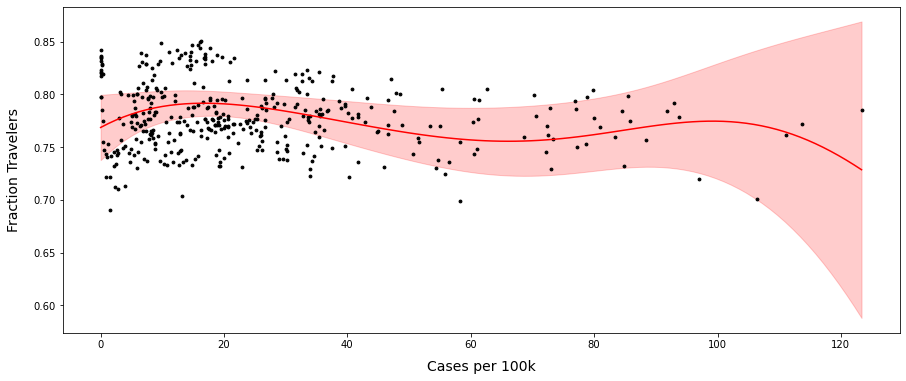

0.497**2 * RBF(length_scale=2e+03)


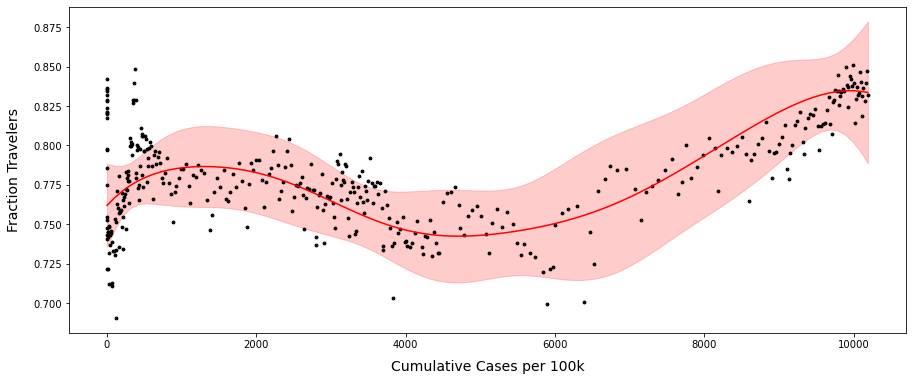

0.501**2 * RBF(length_scale=40)


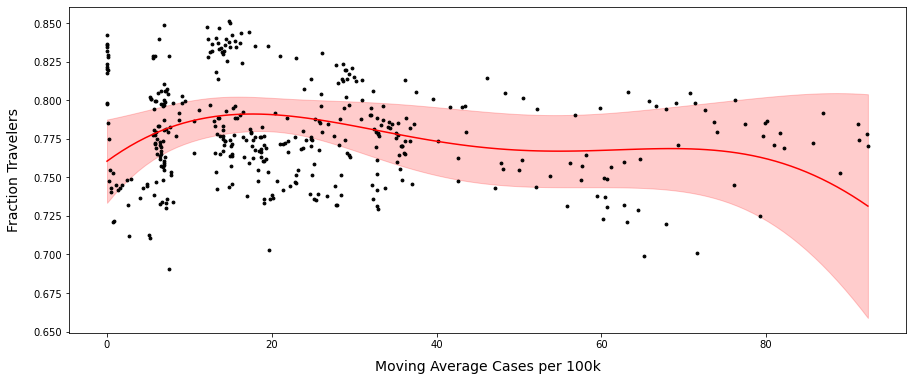

0.51**2 * RBF(length_scale=0.5)


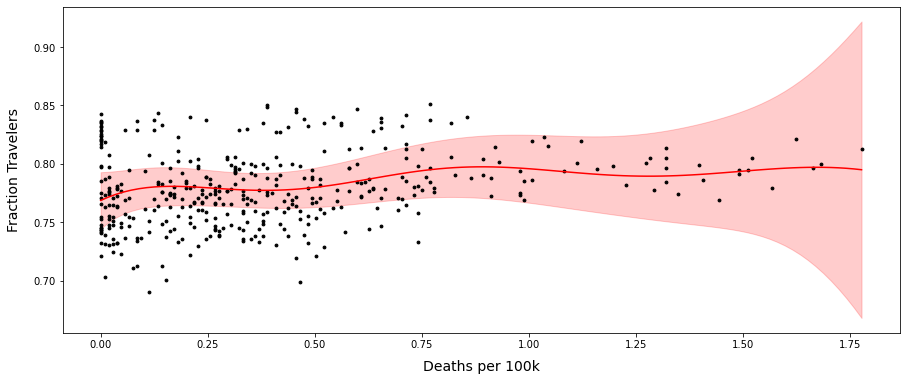

0.498**2 * RBF(length_scale=40)


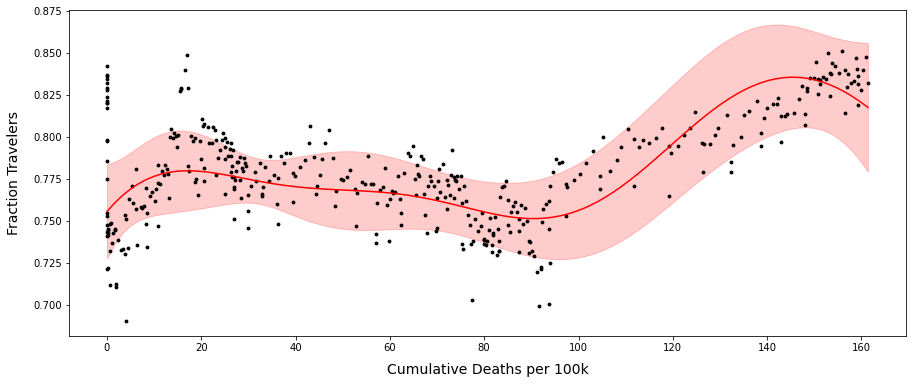

0.501**2 * RBF(length_scale=0.2)


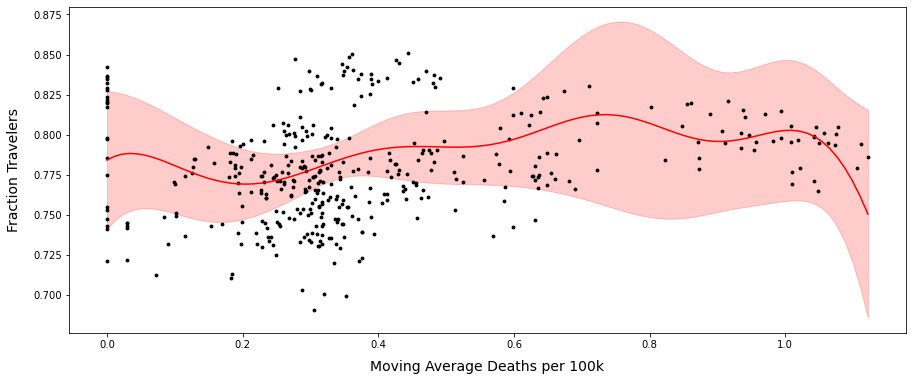

In [91]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Population")
state_length_scales = [40,2000,40,0.5,40,0.2]
for i in range(len(state_X.columns)):
    GPR_wrapper(state_X, state_y, state_X.columns[i], feature_labels[i], state_length_scales[i], "Fraction Travelers")

In [ ]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Population")
fulton_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(fulton_X.columns)):
    spline_wrapper(fulton_X, fulton_y, fulton_X.columns[i], feature_labels[i], fulton_smoothing[i], "Fraction Travelers")

In [ ]:
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Population")
lowndes_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(lowndes_X.columns)):
    spline_wrapper(lowndes_X, lowndes_y, lowndes_X.columns[i], feature_labels[i], lowndes_smoothing[i], "Fraction Travelers")

In [ ]:
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Population")
chatham_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(chatham_X.columns)):
    spline_wrapper(chatham_X, chatham_y, chatham_X.columns[i], feature_labels[i], chatham_smoothing[i], "Fraction Travelers")

# Long Trips

In [ ]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Long")
state_smoothing = [0.4,0.3,0.3,0.5,0.2,0.5]
for i in range(len(state_X.columns)):
    spline_wrapper(state_X, state_y, state_X.columns[i], feature_labels[i], state_smoothing[i], "Fraction Long Trips")

In [ ]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Long")
fulton_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(fulton_X.columns)):
    spline_wrapper(fulton_X, fulton_y, fulton_X.columns[i], feature_labels[i], fulton_smoothing[i], "Fraction Long Trips")

In [ ]:
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Long")
lowndes_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(lowndes_X.columns)):
    spline_wrapper(lowndes_X, lowndes_y, lowndes_X.columns[i], feature_labels[i], lowndes_smoothing[i], "Fraction Long Trips")

In [ ]:
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Long")
chatham_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(chatham_X.columns)):
    spline_wrapper(chatham_X, chatham_y, chatham_X.columns[i], feature_labels[i], chatham_smoothing[i], "Fraction Long Trips")

# Medium Trips

In [ ]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Medium")
state_smoothing = [0.4,0.3,0.3,0.5,0.2,0.5]
for i in range(len(state_X.columns)):
    spline_wrapper(state_X, state_y, state_X.columns[i], feature_labels[i], state_smoothing[i], "Fraction Medium Trips")

In [ ]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Medium")
fulton_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(fulton_X.columns)):
    spline_wrapper(fulton_X, fulton_y, fulton_X.columns[i], feature_labels[i], fulton_smoothing[i], "Fraction Medium Trips")

In [ ]:
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Medium")
lowndes_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(lowndes_X.columns)):
    spline_wrapper(lowndes_X, lowndes_y, lowndes_X.columns[i], feature_labels[i], lowndes_smoothing[i], "Fraction Medium Trips")

In [ ]:
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Medium")
chatham_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(chatham_X.columns)):
    spline_wrapper(chatham_X, chatham_y, chatham_X.columns[i], feature_labels[i], chatham_smoothing[i], "Fraction Medium Trips")

# Short Trips

In [ ]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Short")
state_smoothing = [0.4,0.3,0.3,0.5,0.2,0.5]
for i in range(len(state_X.columns)):
    spline_wrapper(state_X, state_y, state_X.columns[i], feature_labels[i], state_smoothing[i], "Fraction Short Trips")

In [ ]:
dates, fulton_y, fulton_X, feature_labels = covid_feature_extraction.county_extraction("Fulton","Short")
fulton_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(fulton_X.columns)):
    spline_wrapper(fulton_X, fulton_y, fulton_X.columns[i], feature_labels[i], fulton_smoothing[i], "Fraction Short Trips")

In [ ]:
dates, lowndes_y, lowndes_X, feature_labels = covid_feature_extraction.county_extraction("Lowndes","Short")
lowndes_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(lowndes_X.columns)):
    spline_wrapper(lowndes_X, lowndes_y, lowndes_X.columns[i], feature_labels[i], lowndes_smoothing[i], "Fraction Short Trips")

In [ ]:
dates, chatham_y, chatham_X, feature_labels = covid_feature_extraction.county_extraction("Chatham","Short")
chatham_smoothing = [0.4,0.3,0.3,0.5,0.25,0.5]
for i in range(len(chatham_X.columns)):
    spline_wrapper(chatham_X, chatham_y, chatham_X.columns[i], feature_labels[i], chatham_smoothing[i], "Fraction Short Trips")

# BIVARIATE

In [ ]:
spline = interpolate.Rbf(fulton_X["total_cases_cum"]/max(fulton_X["total_cases_cum"]),
                         fulton_X["moving_avg_deaths"]/max(fulton_X["moving_avg_deaths"]),
                         fulton_y,smooth=.01,epsilon=.5)

x1_range = np.arange(0,1.05,0.01)
x2_range = np.arange(0,1.05,0.01)
x1_range, x2_range = np.meshgrid(x1_range, x2_range, indexing='xy')

new_Z = spline(x1_range, x2_range)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

ax.scatter(fulton_X["total_cases_cum"],fulton_X["moving_avg_deaths"],fulton_y,s=2,color='k',alpha=1)
ax.plot_surface(x1_range * max(fulton_X["total_cases_cum"]), x2_range * max(fulton_X["moving_avg_deaths"]),
                new_Z, cmap=cm.coolwarm, linewidth=0, antialiased=True,alpha=.9)

ax.set_xlabel("Cumulative Cases per 100k",fontsize=16,labelpad=10)
ax.set_ylabel("Moving Average Deaths per 100k",fontsize=16,labelpad=12)
ax.set_zlabel("Fraction Travelers",fontsize=16,labelpad=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(12)
ax.tick_params(axis='z', which='major', pad=8)

ax.elev = 25
for i in range(36):
    ax.azim = 10*i
    plt.savefig("movies/fulton_spline_angle{:02d}.png".format(i))
plt.show()